In [1]:
# !pip install timm torch_snippets sklego typer

In [24]:
import torch
import onnx
import torch
import torchvision
import sys
sys.path.append("../../horse_zebra_onnx/")

In [26]:
# from auto_train.infer_classification import ImageClassifier

In [3]:
m = ImageClassifier()

2021-09-01 22:15:01.734 | INFO     | torch_snippets.paths:inner:24 - 1 files found at horses_vs_zebras/models/trained-model-v1


horses_vs_zebras/models/trained-model-v1/20210818-204642-efficientnet_b0-224


In [4]:
# im = torch.ones((1,3,224,224), dtype=torch.float32).cuda()  ## todevice ..

In [2]:
# m.model(im)

In [5]:
dummy_input = torch.randn(1,3,224,224, device='cuda')
model = m.model

# Providing input and output names sets the display names for values
# within the model's graph. Setting these does not change the semantics
# of the graph; it is only for readability.
#
# The inputs to the network consist of the flat list of inputs (i.e.
# the values you would pass to the forward() method) followed by the
# flat list of parameters. You can partially specify names, i.e. provide
# a list here shorter than the number of inputs to the model, and we will
# only set that subset of names, starting from the beginning.
# input_names = [ "actual_input_1" ] + [ "learned_%d" % i for i in range(16) ]
# output_names = [ "output1" ]

torch.onnx.export(m.model, dummy_input, "catvdog.onnx", verbose=True)

graph(%input.1 : Float(1, 3, 224, 224, strides=[150528, 50176, 224, 1], requires_grad=0, device=cuda:0),
      %blocks.0.0.se.conv_reduce.weight : Float(8, 32, 1, 1, strides=[32, 1, 1, 1], requires_grad=1, device=cuda:0),
      %blocks.0.0.se.conv_reduce.bias : Float(8, strides=[1], requires_grad=1, device=cuda:0),
      %blocks.0.0.se.conv_expand.weight : Float(32, 8, 1, 1, strides=[8, 1, 1, 1], requires_grad=1, device=cuda:0),
      %blocks.0.0.se.conv_expand.bias : Float(32, strides=[1], requires_grad=1, device=cuda:0),
      %blocks.1.0.se.conv_reduce.weight : Float(4, 96, 1, 1, strides=[96, 1, 1, 1], requires_grad=1, device=cuda:0),
      %blocks.1.0.se.conv_reduce.bias : Float(4, strides=[1], requires_grad=1, device=cuda:0),
      %blocks.1.0.se.conv_expand.weight : Float(96, 4, 1, 1, strides=[4, 1, 1, 1], requires_grad=1, device=cuda:0),
      %blocks.1.0.se.conv_expand.bias : Float(96, strides=[1], requires_grad=1, device=cuda:0),
      %blocks.1.1.se.conv_reduce.weight : Float

## Get the input/ouput layer names 

In [6]:
model = onnx.load('cat.onnx')
output =[node.name for node in model.graph.output]

input_all = [node.name for node in model.graph.input]
input_initializer =  [node.name for node in model.graph.initializer]
net_feed_input = list(set(input_all)  - set(input_initializer))

print('Inputs: ', net_feed_input)
print('Outputs: ', output)

Inputs:  ['input.1']
Outputs:  ['648']


### Test the onnx file

In [7]:
import numpy as np
import onnxruntime as ort
sess = ort.InferenceSession('horse_zebra.onnx')

input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
pred_onx = sess.run([label_name], {input_name: np.zeros((1, 3, 224,224), dtype=np.float32)})[0]
print(pred_onx)

[[0.0052179  0.38679034]]


In [42]:
requests.post('/predict', json = {'input' : json.dumps(im.tolist())})
class InputIn(BaseModel):
    input : str

@app.post('/')
asyc def predict(inp : InputIn):
    ...
    inp = np.array(json.loads(inp.input))
    sess.run...()


tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]], device='cuda:0')

In [ ]:
torch.onnx.export()

In [ ]:
requests.post('sds:/predict', data)

In [2]:
import sys
sys.path.append('cat-v-dog-classifier-pytorch')

In [3]:
import torch
from utils.helpers import *
import warnings
from PIL import Image
from torchvision import transforms

In [4]:
model_path = 'catvdog.pth'
model = load_model(model_path)

/opt/anaconda/envs/pytorch/lib/python3.8/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torchvision.models.densenet.DenseNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/anaconda/envs/pytorch/lib/python3.8/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/anaconda/envs/pytorch/lib/python3.8/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source cod

In [10]:
def image_transform(imagepath):
    test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
    image = Image.open(imagepath)
    imagetensor = test_transforms(image)
    return imagetensor


model_path = 'catvdog.pth'
try:
    checks_if_model_is_loaded = type(model)
except:
    model = load_model(model_path)
model.eval()
#summary(model, input_size=(3,244,244))
image = image_transform('dog_1.jpg')
image1 = image[None,:,:,:]
model(image1)

# ps=torch.exp(model(image1))
# topconf, topclass = ps.topk(1, dim=1)
# if topclass.item() == 1:
#     print({'class':'dog','confidence':str(topconf.item())})
# else:
#     print({'class':'cat','confidence':str(topconf.item())})


tensor([[-2.7161, -0.0684]], grad_fn=<LogSoftmaxBackward>)

In [ ]:
dummy_input = torch.randn(1,3,224,224, device='cuda')
model = m.model

# Providing input and output names sets the display names for values
# within the model's graph. Setting these does not change the semantics
# of the graph; it is only for readability.
#
# The inputs to the network consist of the flat list of inputs (i.e.
# the values you would pass to the forward() method) followed by the
# flat list of parameters. You can partially specify names, i.e. provide
# a list here shorter than the number of inputs to the model, and we will
# only set that subset of names, starting from the beginning.
# input_names = [ "actual_input_1" ] + [ "learned_%d" % i for i in range(16) ]
# output_names = [ "output1" ]

torch.onnx.export(m.model, dummy_input, "catvdog.onnx", verbose=True)

In [20]:
import cv2
import numpy as np
im = cv2.imread('zebra_1.jpg')


In [21]:
def get_brightness(image, dim=10, thresh=0.5):
    # Resize image to 10x10
    image = cv2.resize(image, (dim, dim))
    # Convert color space to LAB format and extract L channel
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    # Normalize L channel by dividing all pixel values with maximum pixel value
    L = L/np.max(L)
    # Return True if mean is greater than thresh else False
    return np.mean(L)

get_brightness(im)

0.8317254901960783

In [22]:
import matplotlib.pyplot as plt

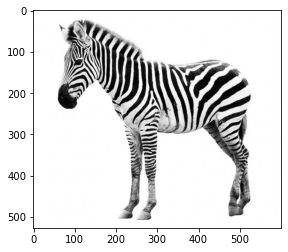

In [23]:
plt.imshow(im)